In [1]:
import geopandas as gpd
import osmnx as ox
import networkx as nx
import rasterio
import matplotlib.pyplot as plt
import folium

/Users/annaanton/.gds/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/55/zw_syyrj63j862t00s33lqxr0000gn/T/ipykernel_21320/3359010474.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://sha

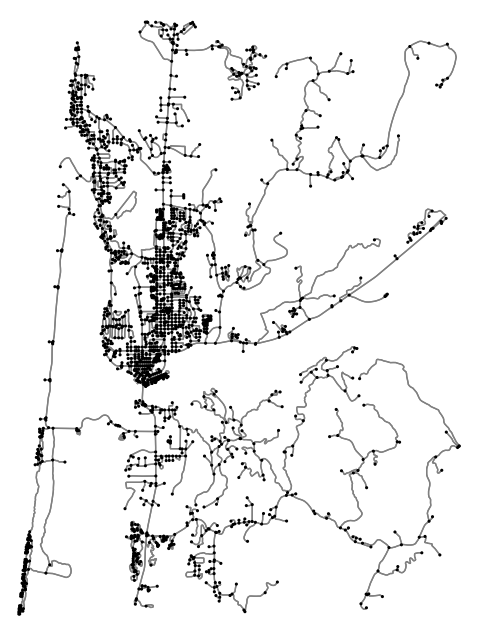

In [2]:
lat_lon = (43.9826, -124.0998)
g = ox.graph_from_point(lat_lon, dist=8000, network_type='walk')
fig, ax = ox.plot_graph(g, bgcolor='white', node_color='black', edge_color='grey', node_size=5)

In [3]:
import numpy as np

In [4]:
import os
os.environ['USE_PYGEOS'] = '0'

In [5]:
cities = gpd.read_file('citylim_2021/citylim_2021.shp')

In [6]:
cities

FID      CITY_NAME       instName unitID  \
0      1  Adair Village  Adair Village   ODOT   
1      2          Adams          Adams   ODOT   
2      3         Adrian         Adrian   ODOT   
3      4         Albany         Albany   ODOT   
4      5          Amity          Amity   ODOT   
..   ...            ...            ...    ...   
236  237       Woodburn       Woodburn   ODOT   
237  238   Wood Village   Wood Village   ODOT   
238  239        Yachats        Yachats   ODOT   
239  240        Yamhill        Yamhill   ODOT   
240  241       Yoncalla       Yoncalla   ODOT   

                            descriptn instCode codeRef   effDate unitOwner  \
0    Incorporated City Limit Boundary    00275    FIPS  20210000   2409661   
1    Incorporated City Limit Boundary    00350    FIPS  20210000   2409662   
2    Incorporated City Limit Boundary    00500    FIPS  20210000   2409664   
3    Incorporated City Limit Boundary    01000    FIPS  20210000   2409675   
4    Incorporated City Limit Boundary    02000    FIPS  20210000   2409700   
..                                ...      ...     ...       ...       ...   
236  Incorporated City Limit Boundary    83750    FIPS  20210000   2412296   
237  Incorporated City Limit Boundary    83950    FIPS  20210000   2412294   
238  Incorporated City Limit Boundary    84200    FIPS  20210000   2412313   
239  Incorporated City Limit Boundary    84250    FIPS  20210000   2412316   
240  Incorporated City Limit Boundary    84600    FIPS  20210000   2412320   

    cSteward         acres EFFECTV_DT GIS_PRC_DT     Shape_Leng    Shape_Area  \
0       ODOT    286.389671       2021  9/20/2021   24645.761574  1.247513e+07   
1       ODOT    230.591317       2021  9/20/2021   14345.564615  1.004456e+07   
2       ODOT    155.900900       2021  9/20/2021   10511.276609  6.791043e+06   
3       ODOT  11342.259180       2021  9/20/2021  262984.796754  4.940688e+08   
4       ODOT    402.796064       2021  9/20/2021   28212.961728  1.754580e+07   
..       ...           ...        ...        ...            ...           ...   
236     ODOT   3854.545975       2021  9/20/2021  119361.079285  1.679040e+08   
237     ODOT    609.367295       2021  9/20/2021   27136.816105  2.654404e+07   
238     ODOT    591.067517       2021  9/20/2021   39230.042590  2.574690e+07   
239     ODOT    311.874274       2021  9/20/2021   26187.901874  1.358524e+07   
240     ODOT    417.436294       2021  9/20/2021   33022.710412  1.818352e+07   

       Shape__Are     Shape__Len  \
0    2.292784e+06   10567.896721   
1    1.916881e+06    6266.173036   
2    1.209549e+06    4436.148400   
3    9.067044e+07  112682.929649   
4    3.274057e+06   12190.267995   
..            ...            ...   
236  3.136511e+07   51585.577148   
237  5.025360e+06   11806.889661   
238  4.674863e+06   16716.842580   
239  2.554732e+06   11357.093437   
240  3.223521e+06   13905.941164   

                                              geometry  
0    POLYGON ((-13716191.298 5571313.822, -13716177...  
1    POLYGON ((-13198645.973 5742114.630, -13198672...  
2    POLYGON ((-13031686.562 5425944.492, -13031686...  
3    POLYGON ((-13706200.198 5570401.686, -13706041...  
4    POLYGON ((-13715105.640 5640690.918, -13715070...  
..                                                 ...  
236  POLYGON ((-13679069.773 5646106.517, -13679016...  
237  POLYGON ((-13626994.915 5706109.799, -13626994...  
238  POLYGON ((-13815340.626 5515900.003, -13815199...  
239  POLYGON ((-13713065.483 5676156.173, -13713066...  
240  POLYGON ((-13723750.250 5405405.572, -13723753...  

[241 rows x 18 columns]

In [7]:
florence = cities[cities["CITY_NAME"]=="Florence"]
florence.head()

FID CITY_NAME  instName unitID                         descriptn instCode  \
66   67  Florence  Florence   ODOT  Incorporated City Limit Boundary    26050   

   codeRef   effDate unitOwner cSteward        acres EFFECTV_DT GIS_PRC_DT  \
66    FIPS  20210000   2410511     ODOT  3805.342939       2021  9/20/2021   

      Shape_Leng    Shape_Area    Shape__Are    Shape__Len  \
66  111542.73731  1.657607e+08  2.977346e+07  47297.570112   

                                             geometry  
66  POLYGON ((-13818253.942 5471062.805, -13818251...

In [8]:
node_graph = ox.graph_to_gdfs(g, nodes=True, edges=False)
edge_graph = ox.graph_to_gdfs(g, nodes=False, edges=True)

In [9]:
node_reproject = node_graph.to_crs('EPSG:32610')
edge_reproject = edge_graph.to_crs('EPSG:32610')
florence_reproject = florence.to_crs('EPSG:32610')

In [10]:
from shapely.geometry import Polygon

In [11]:
node_clip = node_reproject.clip(florence_reproject)

<AxesSubplot: >

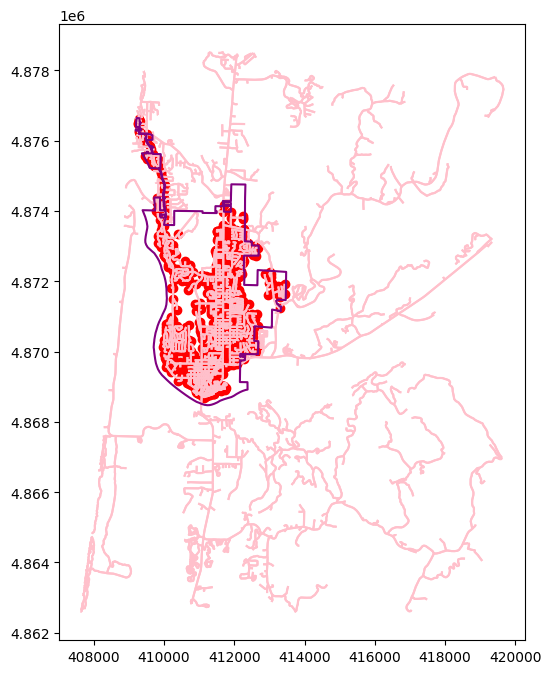

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
edge_reproject.plot(ax=ax, color="pink")
node_clip.plot(ax=ax, color="red")
florence_reproject.boundary.plot(ax=ax, color="purple")

In [13]:
assemblyareas = gpd.read_file('EvacuationBrochure_Data/Assembly_Areas.shp')
evac_zones = gpd.read_file('EvacuationBrochure_Data/EvacuationZones.shp')

In [14]:
florence_buffer = florence_reproject.envelope
florence_buffer = florence_buffer.scale(2.4,2)

<AxesSubplot: >

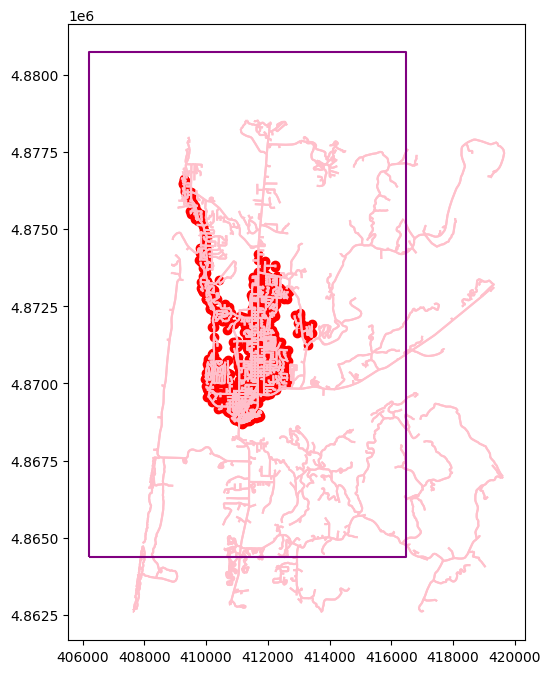

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
edge_reproject.plot(ax=ax, color="pink")
node_clip.plot(ax=ax, color="red")
florence_buffer.boundary.plot(ax=ax, color="purple")

In [16]:
evac_reproject = evac_zones.to_crs('EPSG:32610')
assembly_reproject = assemblyareas.to_crs('EPSG:32610')

In [17]:
evac_clip = evac_reproject.clip(florence_buffer)
assembly_clip = assembly_reproject.clip(florence_buffer)

/Users/annaanton/.gds/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

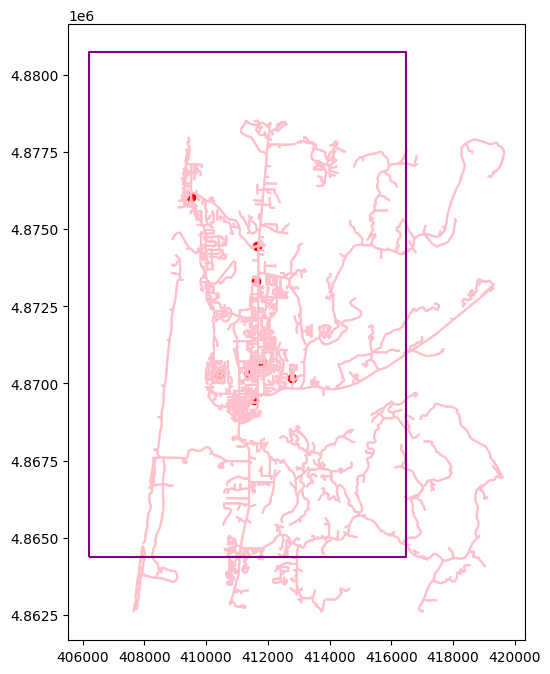

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
edge_reproject.plot(ax=ax, color="pink")
assembly_clip.plot(ax=ax, color="red")                               
florence_buffer.boundary.plot(ax=ax, color="purple")

<AxesSubplot: >

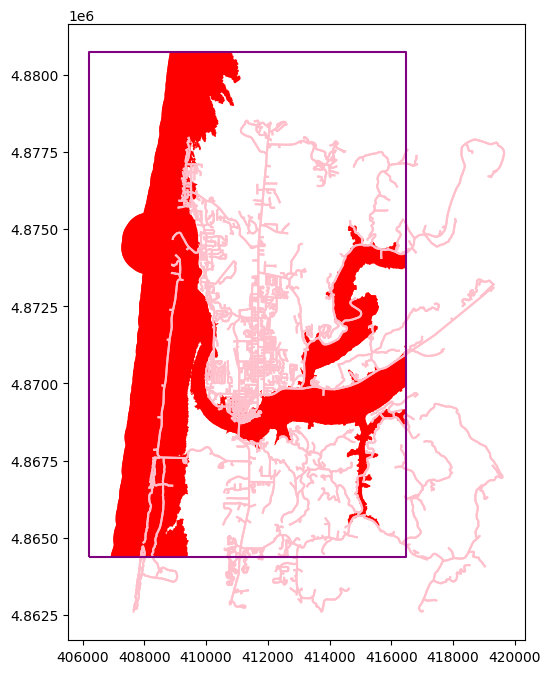

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
edge_reproject.plot(ax=ax, color="pink")
evac_clip.plot(ax=ax, color="red")
florence_buffer.boundary.plot(ax=ax, color="purple")

In [20]:
XXL = gpd.read_file('Statewide_Tsunami_Scenarios/Statewide_XXL_Tsunami_Inundation_Scenario.shp')

In [21]:
XXL_reproject = XXL.to_crs('EPSG:32610')

In [22]:
XXL_clip = XXL_reproject.clip(florence_buffer)

/Users/annaanton/.gds/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [23]:
XXL_clip.head()

Shape_Area                                           geometry
0  5.123301e+09  MULTIPOLYGON (((410863.735 4880711.484, 410824...

In [24]:
evac_clip = evac_clip[evac_clip["Id"]==2]
evac_clip

Id                      Location                             Type  \
8   2  Central Coast Model - Grid C  Distant Tsunami Evacuation Zone   

                                            geometry  
8  POLYGON ((410151.517 4880719.485, 410177.891 4...

In [25]:
crit_facil = gpd.read_file('EvacuationBrochure_Data/CriticalFacilities.shp')

In [26]:
crit_reproject = crit_facil.to_crs('EPSG:32610')

In [27]:
crit_clip = crit_reproject.clip(florence_buffer)

In [28]:
distant_node_clip = node_clip.clip(evac_clip)
node_clip = node_clip.clip(XXL_clip)

In [29]:
pip install mapclassify


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
import mapclassify

In [31]:
m = edge_reproject.explore(
     column="length", # make choropleth based on column
     scheme="naturalbreaks",         # use mapclassify's natural breaks scheme
     tooltip="name",# show column value in tooltip (on hover)
     popup=True,                     # show all values in popup (on click)
     tiles="CartoDB positron",       # use "CartoDB positron" tiles
     cmap="Greens",                  # use "Greens" matplotlib colormap
     style_kwds=dict(color="black", weight=0.5) # use black outline with weight of 1
    )
m

In [32]:
g_proj = ox.project_graph(g, to_crs=None)

In [33]:
node_id = node_clip
node_id["id"] = node_id.index
node_id

y           x  street_count highway  \
osmid                                                     
3954533826  43.967508 -124.103852             3     NaN   
3954533828  43.967596 -124.103614             3     NaN   
3954533830  43.967683 -124.103383             3     NaN   
3954533832  43.967741 -124.103227             3     NaN   
8131022244  43.967918 -124.103041             3     NaN   
...               ...         ...           ...     ...   
6069919469  44.035936 -124.132370             1     NaN   
39867536    44.036463 -124.131925             3     NaN   
39994446    44.036645 -124.131877             3     NaN   
6069919689  44.036828 -124.132126             3     NaN   
39867544    44.037174 -124.132224             3     NaN   

                                  geometry          id  
osmid                                                   
3954533826  POINT (411451.189 4868856.225)  3954533826  
3954533828  POINT (411470.397 4868865.832)  3954533828  
3954533830  POINT (411489.039 4868875.148)  3954533830  
3954533832  POINT (411501.656 4868881.455)  3954533832  
8131022244  POINT (411516.815 4868900.904)  8131022244  
...                                    ...         ...  
6069919469  POINT (409267.816 4876487.482)  6069919469  
39867536    POINT (409304.284 4876545.470)    39867536  
39994446    POINT (409308.440 4876565.698)    39994446  
6069919689  POINT (409288.736 4876586.276)  6069919689  
39867544    POINT (409281.411 4876624.759)    39867544  

[198 rows x 6 columns]

In [34]:
test_node = node_id[node_id["id"]==3954533826]
test_node

y           x  street_count highway  \
osmid                                                     
3954533826  43.967508 -124.103852             3     NaN   

                                  geometry          id  
osmid                                                   
3954533826  POINT (411451.189 4868856.225)  3954533826

In [35]:
assembly_clip

Location                     notes County  \
97              Florence Events Center                      None   Lane   
98         Three Rivers Casino & Hotel                      None   Lane   
95                Greentrees Clubhouse                      None   Lane   
249                        Miller Park                      None   Lane   
96   Grocery Outlet / Florence Cinemas                      None   Lane   
94                          Fred Meyer                      None   Lane   
93           Heceta Beach Rd & Hwy 101                      None   Lane   
248                    Rhododendron Dr  South of Heceta Beach Rd   Lane   

     Evac_Map                        geometry  
97   Florence  POINT (411539.241 4869452.541)  
98   Florence  POINT (412790.601 4870180.205)  
95   Florence  POINT (410426.232 4870311.088)  
249  Florence  POINT (411374.567 4870324.635)  
96   Florence  POINT (411801.707 4870704.576)  
94   Florence  POINT (411633.250 4873325.055)  
93   Florence  POINT (411664.621 4874464.132)  
248  Florence  POINT (409518.044 4876029.585)

In [36]:
target_node = assembly_clip[assembly_clip["Location"]=="Florence Events Center"]
target_node

Location notes County  Evac_Map  \
97  Florence Events Center  None   Lane  Florence   

                          geometry  
97  POINT (411539.241 4869452.541)

In [37]:
orig_xy = [test_node['geometry'].y.values[0], test_node['geometry'].x.values[0]]
target_xy = [target_node['geometry'].y.values[0], target_node['geometry'].x.values[0]]

In [38]:
orig_n = ox.distance.nearest_nodes(g_proj, X=orig_xy[1], Y=orig_xy[0], return_dist=False)
target_n = ox.distance.nearest_nodes(g_proj, X=target_xy[1], Y=target_xy[0], return_dist=False)

In [39]:
route = nx.shortest_path(g_proj, source=orig_n, target=target_n, weight='length')

In [40]:
# Plot the shortest path using folium
m = ox.plot_route_folium(g, route, weight=5)
m

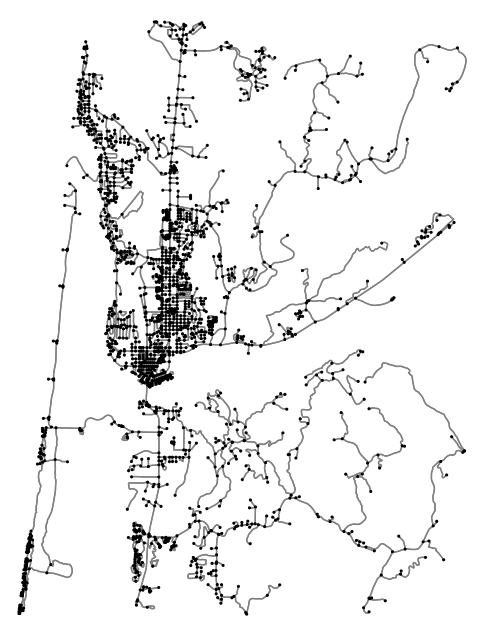

In [41]:
fig, ax = ox.plot_graph(g_proj, bgcolor='white', node_color='black', edge_color='grey', node_size=5)

In [42]:
target_xy = [assembly_clip['geometry'].y.values, assembly_clip['geometry'].x.values]
target_nodes = ox.distance.nearest_nodes(g_proj, X=target_xy[1], Y=target_xy[0], return_dist=False)

In [43]:
origin_xy =[node_clip['geometry'].y.values, node_clip['geometry'].x.values]
origin_nodes= ox.distance.nearest_nodes(g_proj, X=origin_xy[1], Y=origin_xy[0], return_dist=False)

In [44]:
node_id

y           x  street_count highway  \
osmid                                                     
3954533826  43.967508 -124.103852             3     NaN   
3954533828  43.967596 -124.103614             3     NaN   
3954533830  43.967683 -124.103383             3     NaN   
3954533832  43.967741 -124.103227             3     NaN   
8131022244  43.967918 -124.103041             3     NaN   
...               ...         ...           ...     ...   
6069919469  44.035936 -124.132370             1     NaN   
39867536    44.036463 -124.131925             3     NaN   
39994446    44.036645 -124.131877             3     NaN   
6069919689  44.036828 -124.132126             3     NaN   
39867544    44.037174 -124.132224             3     NaN   

                                  geometry          id  
osmid                                                   
3954533826  POINT (411451.189 4868856.225)  3954533826  
3954533828  POINT (411470.397 4868865.832)  3954533828  
3954533830  POINT (411489.039 4868875.148)  3954533830  
3954533832  POINT (411501.656 4868881.455)  3954533832  
8131022244  POINT (411516.815 4868900.904)  8131022244  
...                                    ...         ...  
6069919469  POINT (409267.816 4876487.482)  6069919469  
39867536    POINT (409304.284 4876545.470)    39867536  
39994446    POINT (409308.440 4876565.698)    39994446  
6069919689  POINT (409288.736 4876586.276)  6069919689  
39867544    POINT (409281.411 4876624.759)    39867544  

[198 rows x 6 columns]

In [45]:
routes = []
lengths = []
routes_final = []
lengths_final= []
nodes_final = []
node_index = -1
for origin in range(len(origin_nodes)):
    node_index += 1
    og_node = origin_nodes[node_index]
    nodes_final.append(og_node)
    for i in range(len(target_nodes)):
        routes.append(nx.shortest_path(g_proj, source=og_node, target=target_nodes[i], weight='length'))
        lengths.append(nx.shortest_path_length(g_proj, source=og_node, target=target_nodes[i], weight='length'))
    min_len = min(lengths)
    min_index = lengths.index(min_len)
    min_route = routes[min_index]
    lengths_final.append(min_len)
    routes_final.append(min_route)
    routes = []
    lengths = []

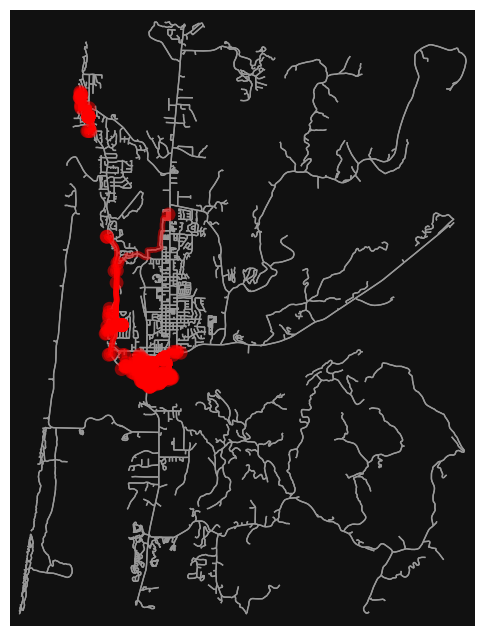

In [46]:
fig, ax = ox.plot_graph_routes(g_proj, routes_final,route_linewidth=6, node_size=0)

In [47]:
import pandas as pd

In [48]:
nodes_df = pd.DataFrame(lengths_final, index=nodes_final,  columns =['Distance_m'])
nodes_df["id"] = nodes_df.index
nodes_df.head()

Distance_m          id
3954533826     812.647  3954533826
3954533828     834.087  3954533828
3954533830     854.892  3954533830
3954533832     855.069  3954533832
8131022244     839.300  8131022244

In [49]:
node_id = node_id.merge(nodes_df, on='id')

In [50]:
node_id['speed_15m_kmh'] = (node_id['Distance_m']/1000)/(0.25)
node_id.head()

y           x  street_count highway  \
0  43.967508 -124.103852             3     NaN   
1  43.967596 -124.103614             3     NaN   
2  43.967683 -124.103383             3     NaN   
3  43.967741 -124.103227             3     NaN   
4  43.967918 -124.103041             3     NaN   

                         geometry          id  Distance_m  speed_15m_kmh  
0  POINT (411451.189 4868856.225)  3954533826     812.647       3.250588  
1  POINT (411470.397 4868865.832)  3954533828     834.087       3.336348  
2  POINT (411489.039 4868875.148)  3954533830     854.892       3.419568  
3  POINT (411501.656 4868881.455)  3954533832     855.069       3.420276  
4  POINT (411516.815 4868900.904)  8131022244     839.300       3.357200

In [51]:
node_id['time_walk_min'] = node_id['Distance_m']/72
node_id.head()

y           x  street_count highway  \
0  43.967508 -124.103852             3     NaN   
1  43.967596 -124.103614             3     NaN   
2  43.967683 -124.103383             3     NaN   
3  43.967741 -124.103227             3     NaN   
4  43.967918 -124.103041             3     NaN   

                         geometry          id  Distance_m  speed_15m_kmh  \
0  POINT (411451.189 4868856.225)  3954533826     812.647       3.250588   
1  POINT (411470.397 4868865.832)  3954533828     834.087       3.336348   
2  POINT (411489.039 4868875.148)  3954533830     854.892       3.419568   
3  POINT (411501.656 4868881.455)  3954533832     855.069       3.420276   
4  POINT (411516.815 4868900.904)  8131022244     839.300       3.357200   

   time_walk_min  
0      11.286764  
1      11.584542  
2      11.873500  
3      11.875958  
4      11.656944

In [52]:
assembly_clip.head()

Location notes County  Evac_Map  \
97              Florence Events Center  None   Lane  Florence   
98         Three Rivers Casino & Hotel  None   Lane  Florence   
95                Greentrees Clubhouse  None   Lane  Florence   
249                        Miller Park  None   Lane  Florence   
96   Grocery Outlet / Florence Cinemas  None   Lane  Florence   

                           geometry  
97   POINT (411539.241 4869452.541)  
98   POINT (412790.601 4870180.205)  
95   POINT (410426.232 4870311.088)  
249  POINT (411374.567 4870324.635)  
96   POINT (411801.707 4870704.576)

In [53]:
xxl_bound = XXL_clip.boundary
m = node_id.explore(
     column="Distance_m", 
     scheme="naturalbreaks",       
     tooltip="speed_15m_kmh",
     popup=True,                     
     tiles="CartoDB positron",       
     cmap="YlOrRd",                  
     name="Nodes"
    )
xxl_bound.explore(
     m=m,
     color="red", 
     name="Evac zone" 
)
assembly_clip.explore(
     m=m, 
     color="darkmagenta", 
     marker_kwds=dict(radius=5, fill=True), 
     tooltip="Location", 
     tooltip_kwds=dict(labels=False),
     name="Assembly Areas" 


)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

In [54]:
m.save('map_florence.html')

<AxesSubplot: >

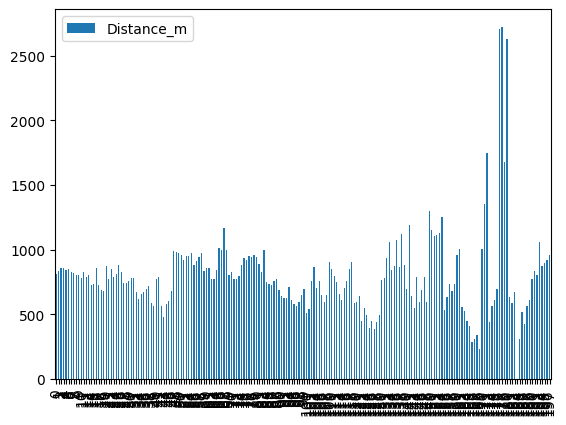

In [55]:
node_id.plot.bar(y='Distance_m')

In [56]:
w = node_id.explore(
     column="speed_15m_kmh", 
     scheme="naturalbreaks",       
     tooltip="Distance_m",
     popup=True,                     
     tiles="CartoDB positron",       
     cmap="YlOrRd",                  
     name="Nodes"
    )
xxl_bound.explore(
     m=m,
     color="red", 
     name="Evac zone" 
)
assembly_clip.explore(
     m=m, 
     color="darkmagenta", 
     marker_kwds=dict(radius=5, fill=True), 
     tooltip="Location", 
     tooltip_kwds=dict(labels=False),
     name="Assembly Areas" 


)
folium.TileLayer('cartodbdark_matter').add_to(w)
folium.LayerControl().add_to(w)
w